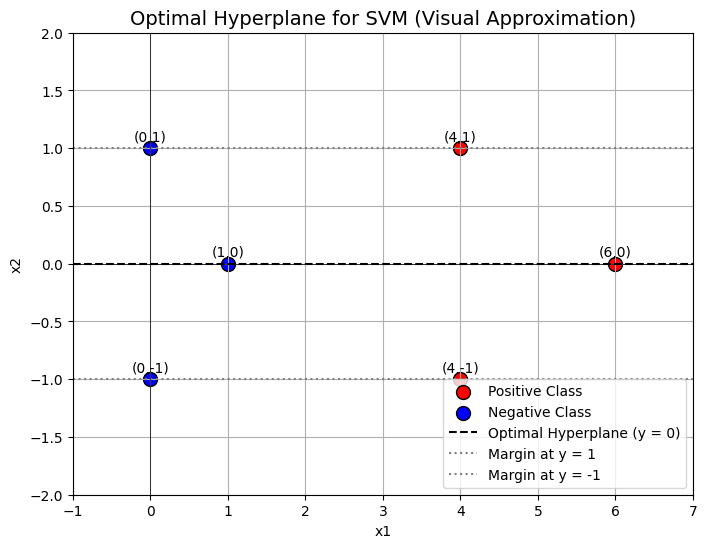

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

positive_class = np.array([[4, 1], [4, -1], [6, 0]])
negative_class = np.array([[1, 0], [0, 1], [0, -1]])

plt.figure(figsize=(8, 6))
plt.scatter(positive_class[:, 0], positive_class[:, 1], color='red', label='Positive Class', s=100, edgecolors='black')
plt.scatter(negative_class[:, 0], negative_class[:, 1], color='blue', label='Negative Class', s=100, edgecolors='black')

all_points = np.concatenate([positive_class, negative_class])
labels = ["(4,1)", "(4,-1)", "(6,0)", "(1,0)", "(0,1)", "(0,-1)"]

for i, txt in enumerate(labels):
    plt.annotate(txt, (all_points[i][0], all_points[i][1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

x_values = np.linspace(-1, 7, 100)
y_values = np.zeros_like(x_values)

plt.plot(x_values, y_values, color='black', linestyle='--', label='Optimal Hyperplane (y = 0)')

plt.plot(x_values, y_values + 1, color='gray', linestyle=':', label='Margin at y = 1')
plt.plot(x_values, y_values - 1, color='gray', linestyle=':', label='Margin at y = -1')

plt.title('Optimal Hyperplane for SVM (Visual Approximation)', fontsize=14)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-1, 7)
plt.ylim(-2, 2)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

plt.grid(True)
plt.show()

SVM with RBF Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


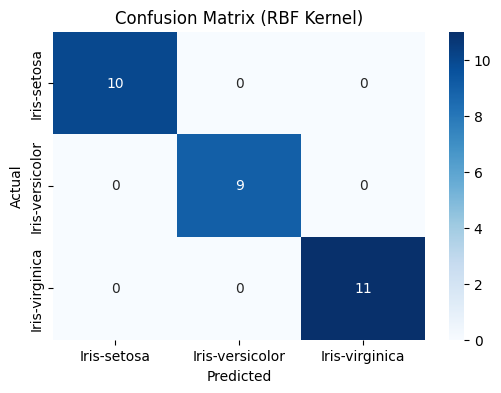


SVM with Linear Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


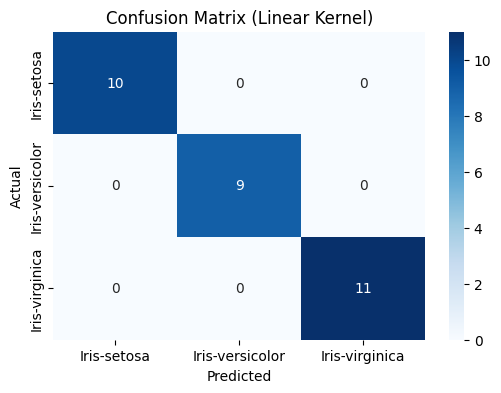

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/iris (1) (1).csv')

X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print("SVM with RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print("Confusion Matrix:\n", cm_rbf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['species'].unique(),
            yticklabels=data['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RBF Kernel)')
plt.show()

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

print("\nSVM with Linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Confusion Matrix:\n", cm_linear)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['species'].unique(),
            yticklabels=data['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Linear Kernel)')
plt.show()

SVM Classifier:
Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0
  

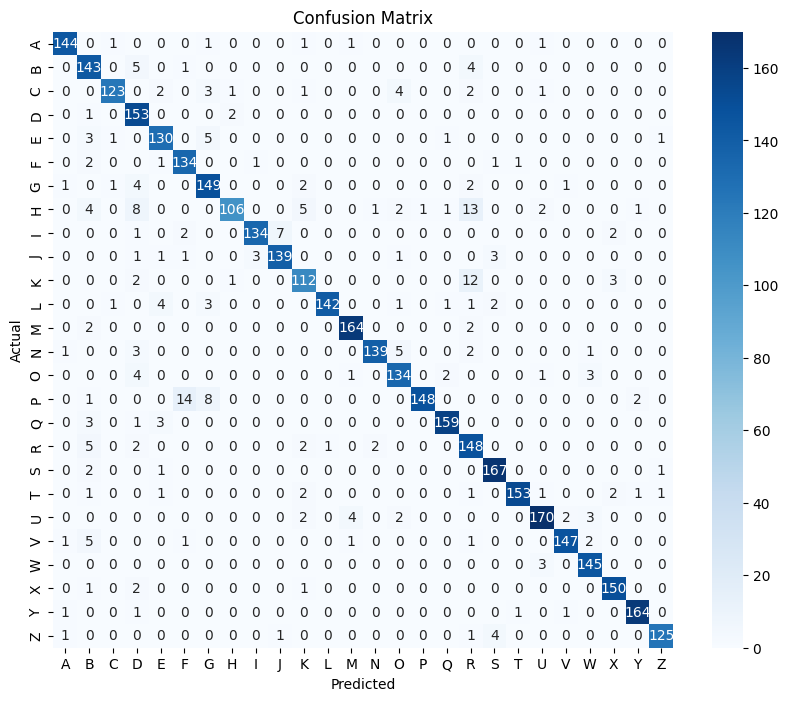

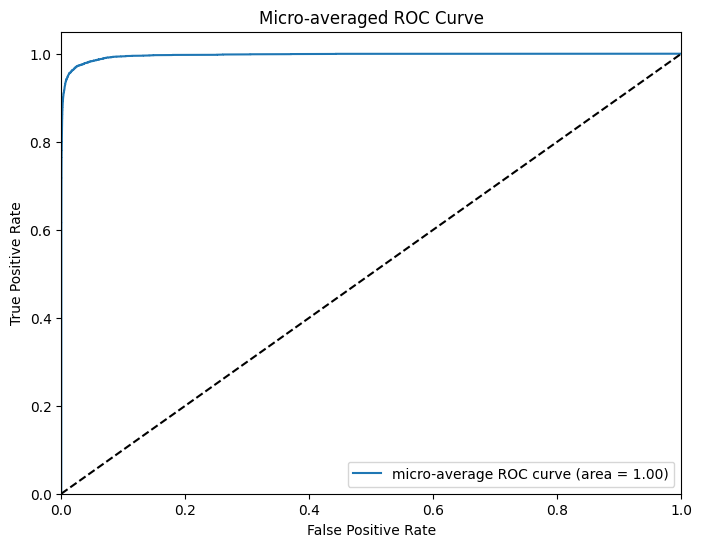

Micro-averaged AUC: 0.9966062575000001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

data = pd.read_csv('/content/letter-recognition.csv')  # Replace with the correct path if necessary

X = data.drop('letter', axis=1)
y = data['letter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='rbf', probability=True) # probability=True is needed for ROC curve
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("SVM Classifier:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Micro-averaged AUC: {roc_auc['micro']}")
